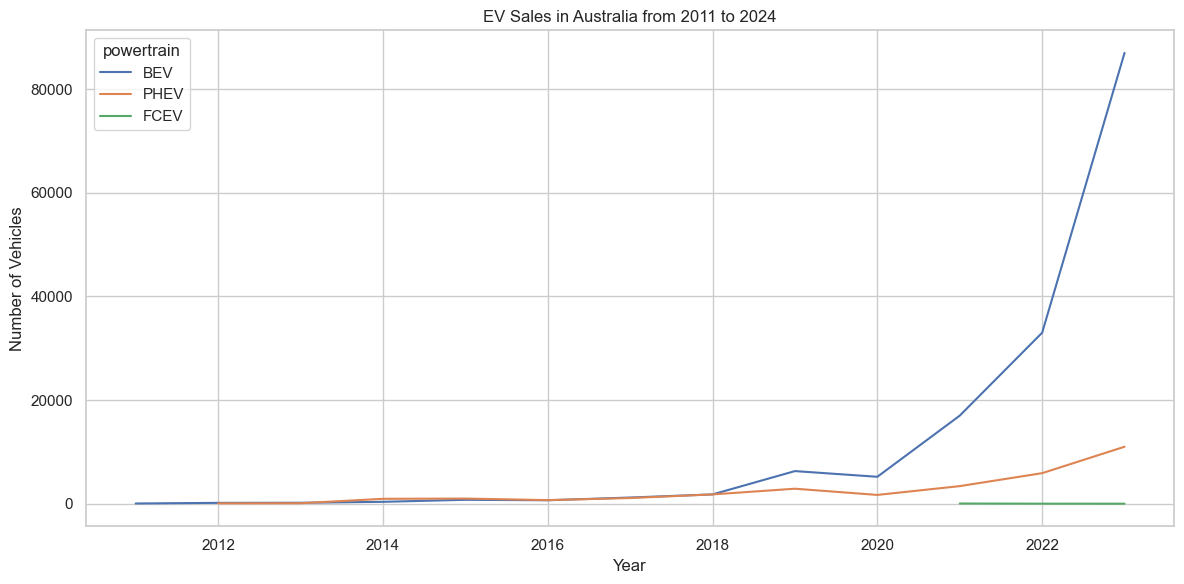

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:/1Assignments_T2/Team project (A)/Global_EV_Data_2024.csv')

df_filtered = df[(df['region'] == 'Australia') & (df['parameter'] == 'EV sales')]

df_sorted = df_filtered.sort_values(by='year')

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=df_sorted, x='year', y='value', hue='powertrain')
ax.set_title('EV Sales in Australia from 2011 to 2024')
ax.set_ylabel('Number of Vehicles')

ax.set_xlabel('Year')

plt.tight_layout()
plt.show()


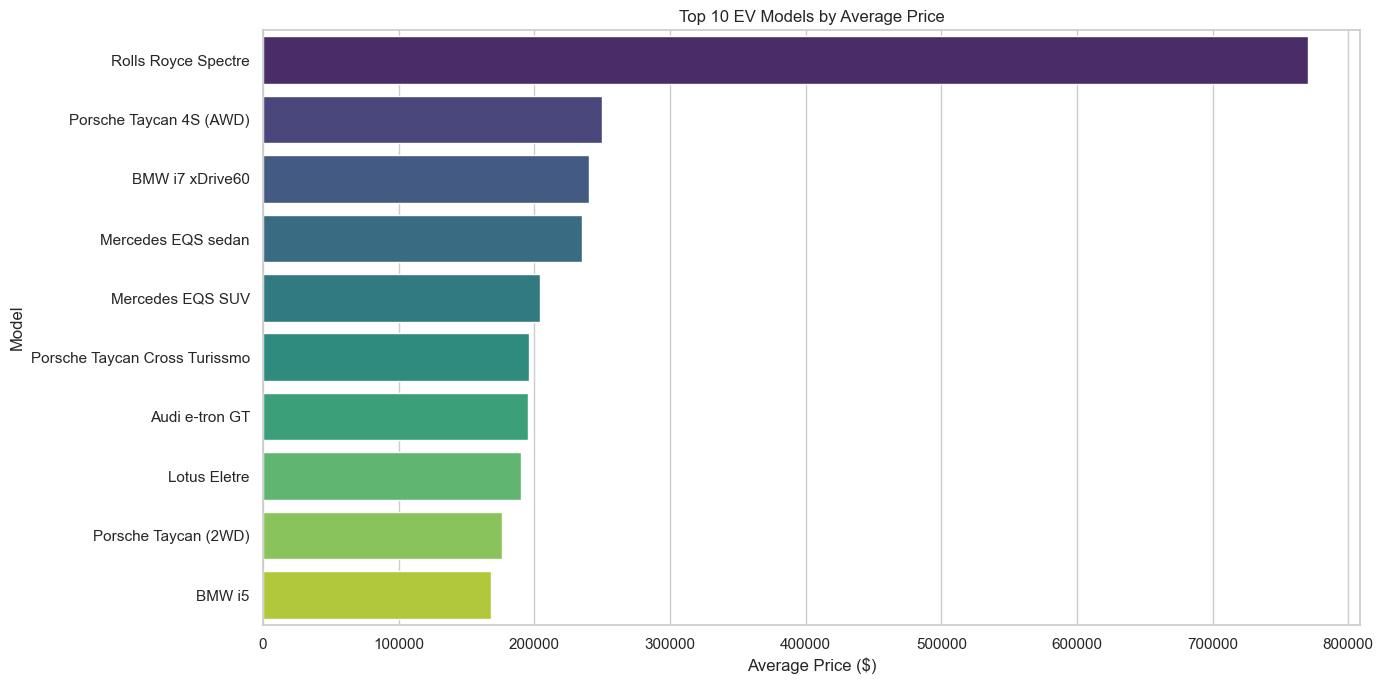

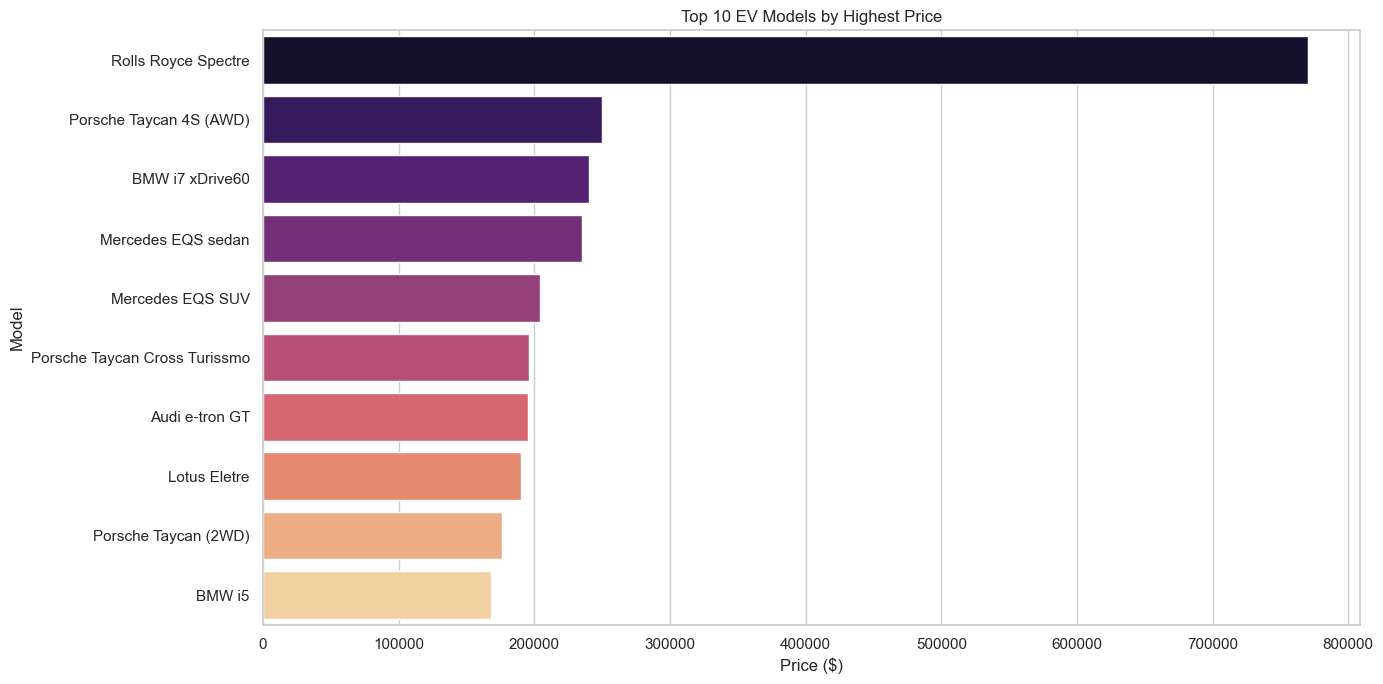

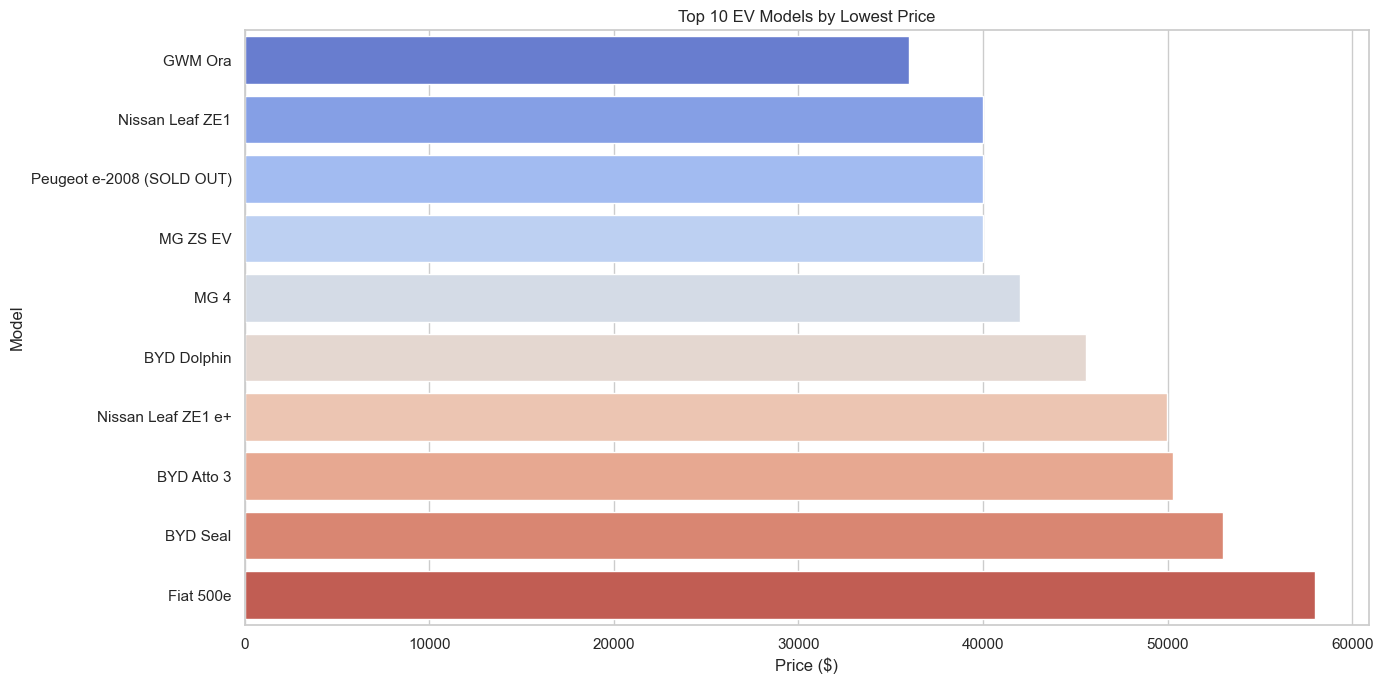

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_excel('D:/1Assignments_T2/Team project (A)/EV_database.xlsx')
except Exception as e:
    print(f"Error loading the file: {e}")

def clean_price(price):
    price = str(price).replace('$', '').replace(',', '').replace('k', '000').replace('TBC', '')
    return pd.to_numeric(price, errors='coerce')

df['Price'] = df['Price'].apply(clean_price)

average_prices = df.groupby('Model')['Price'].mean().reset_index()

top_10_average_prices = average_prices.sort_values(by='Price', ascending=False).head(10)

top_10_brands = df.sort_values(by='Price', ascending=False).drop_duplicates(subset=['Model']).head(10)

top_10_low_price = df.sort_values(by='Price', ascending=True).drop_duplicates(subset=['Model']).head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_average_prices, x='Price', y='Model', palette='viridis')
plt.title('Top 10 EV Models by Average Price')
plt.xlabel('Average Price ($)')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_brands, x='Price', y='Model', palette='magma')
plt.title('Top 10 EV Models by Highest Price')
plt.xlabel('Price ($)')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_low_price, x='Price', y='Model', palette='coolwarm')
plt.title('Top 10 EV Models by Lowest Price')
plt.xlabel('Price ($)')
plt.ylabel('Model')
plt.tight_layout()
plt.show()


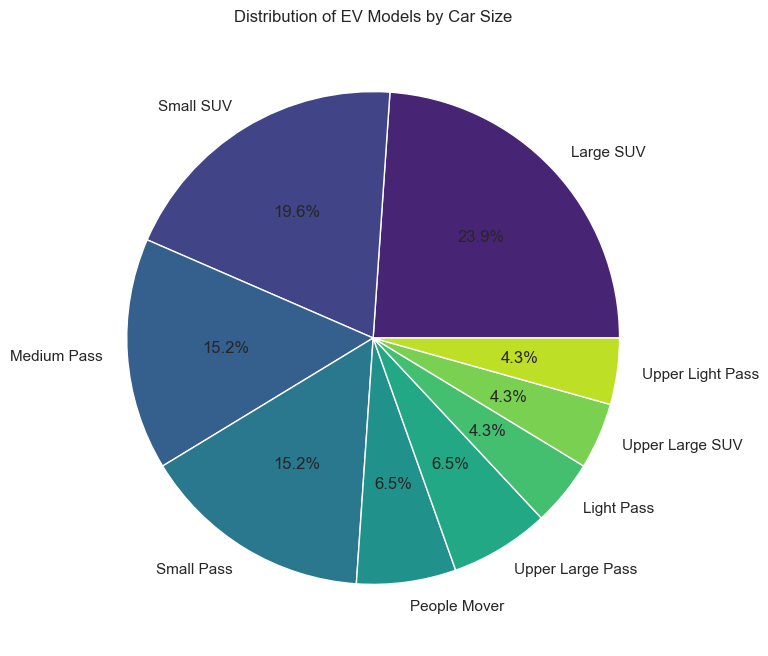

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_excel('D:/1Assignments_T2/Team project (A)/EV_database.xlsx')
except Exception as e:
    print(f"Error loading the file: {e}")

size_order = [ 'Large SUV', 'Light Pass', 'Medium Pass', 'People Mover','Small Pass', 'Small SUV', 'Upper Large Pass', 'Upper Large SUV', 'Upper Light Pass']

df['Size class'] = pd.Categorical(df['Size class'], categories=size_order, ordered=True)

size_counts = df['Size class'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(size_counts)))
plt.title('Distribution of EV Models by Car Size')
plt.show()

